In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
data1 = pd.read_csv('stageb_dataset.csv')
data1.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28,NaN,NaN


In [4]:
#DROPPING UNWANTWED COLUMNS FILLED WITH NaNS

data1 = data1.drop(['Unnamed: 10', 'Unnamed: 11'], axis = 1)
data1.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28


In [5]:
#DROPPING UNWANTED ROWS FILLED WITH NaNS

data1 = data1.iloc[:768]
data1.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28


In [6]:
#RENAME COLUMNS

column = {'X1' : 'Relative Compactness',
          'X2' : 'Surface Area',
          'X3' : 'Wall Area',
          'X4' : 'Roof Area',
          'X5' : 'Overall Height',
          'X6' : 'Orientation',
          'X7' : 'Glazing Area',
          'X8' : 'Glazing Area Distribution',
          'Y1' : 'Heating Load',
          'Y2' : 'Cooling Load'}

data1 = data1.rename(columns = column)
data1.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28


<AxesSubplot:xlabel='Relative Compactness', ylabel='Heating Load'>

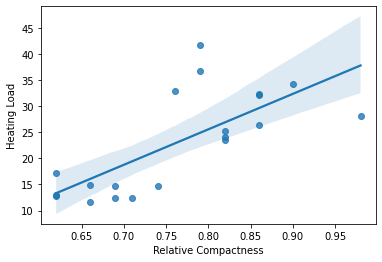

In [7]:
#CHECKING FOR BEST LINE OF FIT WITH SEABORN'S SCATTERED PLOT

simple_linear_regression = data1[['Relative Compactness', 'Heating Load']].sample(20, random_state = 2)
sns.regplot(x = 'Relative Compactness', y = 'Heating Load', data = simple_linear_regression)

In [8]:
#NORMALIZE DATASET USING MIN-MAX SCALER

scaler = MinMaxScaler ()
normalized_data1 = pd.DataFrame(scaler.fit_transform(data1), columns = data1.columns)
features_data1 = normalized_data1.drop(columns = ['Heating Load', 'Cooling Load'])

target = normalized_data1['Heating Load']

In [9]:
#SPLIT DATASET

X_train, X_test, y_train, y_test = train_test_split(features_data1, target, test_size = 0.2, random_state = 1)

In [10]:
#TRAIN DATASET

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [11]:
#TEST TRAINED MODEL

predict = model.predict(X_test)
predict

array([0.20825195, 0.57788086, 0.73205566, 0.71435547, 0.7668457 ,
       0.25805664, 0.17932129, 0.60583496, 0.23303223, 0.5369873 ,
       0.3302002 , 0.65490723, 0.70288086, 0.29052734, 0.18005371,
       0.70935059, 0.55651855, 0.31311035, 0.25939941, 0.74682617,
       0.71508789, 0.07788086, 0.61035156, 0.31811523, 0.1973877 ,
       0.74584961, 0.32775879, 0.19445801, 0.80358887, 0.27832031,
       0.67077637, 0.7199707 , 0.13623047, 0.29699707, 0.57507324,
       0.81408691, 0.34729004, 0.12573242, 0.72155762, 0.22973633,
       0.80847168, 0.17431641, 0.09277344, 0.16381836, 0.13220215,
       0.14123535, 0.47839355, 0.6875    , 0.75305176, 0.7265625 ,
       0.09411621, 0.66711426, 0.09814453, 0.23510742, 0.75415039,
       0.76794434, 0.7166748 , 0.61413574, 0.15332031, 0.2767334 ,
       0.20666504, 0.59106445, 0.59814453, 0.75244141, 0.56152344,
       0.93579102, 0.67858887, 0.32861328, 0.6809082 , 0.25317383,
       0.54199219, 0.23352051, 0.23046875, 0.73266602, 0.29528

In [12]:
#CHECK PERFORMANCE USING MEAN ABSOLUTE ERROR METRIC

mae = mean_absolute_error (y_test, predict)
round(mae, 2)

0.06

In [13]:
#CHECK PERFORMANCE USING RESIDUAL SUM OF SQUARES

rss = np.sqrt(mean_squared_error(y_test, predict))
round(rss, 2)

0.09

In [14]:
#CHECK PERFORMANCE USING R-SQUARED

r2 = r2_score(y_test, predict)
round(r2, 2)

0.9

In [15]:
#APPLYING RIDGE OR L2 REGULARIZATION

l2_reg = Ridge(alpha = 0.5)
l2_reg.fit(X_train, y_train)

Ridge(alpha=0.5)

In [16]:
#APPLYING LASSO OR L1 REGULARIZATION

l1_reg = Lasso(alpha = 0.001)
l1_reg.fit(X_train, y_train)

Lasso(alpha=0.001)

In [16]:
#COMPARE EFFECTS OF REGULARIZATION

def weights_data1 (model, feat, column_name):
    
    #this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', column_name]
    weights_df[column_name].round(3)
    return weights_df

In [17]:
model_weights = weights_data1(model, X_train, 'Linear Model Weights')
l2_weights = weights_data1(l2_reg, X_train, 'L2 Weights')
l1_weights = weights_data1(l1_reg, X_train, 'L1 Weights')

In [18]:
final_weights = pd.merge(model_weights, l2_weights, on = 'Features')
final_weights = pd.merge(final_weights, l1_weights, on = 'Features')

print(final_weights)

                    Features  Linear Model Weights  L2 Weights  L1 Weights
0                  Roof Area         -3.291429e+12   -0.166305   -0.000000
1                  Wall Area         -2.560000e+12    0.099637    0.199666
2       Relative Compactness         -6.186815e-01   -0.307159   -0.041085
3                Orientation         -4.975796e-03    0.000872    0.000000
4  Glazing Area Distribution          6.073761e-02    0.033204    0.024439
5               Glazing Area          2.056601e-01    0.210440    0.204055
6             Overall Height          3.969727e-01    0.451236    0.471650
7               Surface Area          4.388572e+12   -0.066607    0.000000
